In [1]:
import pandas as pd
import numpy as np
import math as mt

In [2]:
data = pd.read_csv("Creditcard_data.csv")


In [3]:
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [4]:
y = data["Class"]
X = data[data.columns.drop("Class")]

In [5]:
#!conda install -y imbalanced-learn

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/sidharths/miniconda3/envs/tensorflow

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.10.1    |     pyhd8ed1ab_0         131 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         131 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.10.1-pyhd8ed1ab_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [6]:
from imblearn.over_sampling import ADASYN


In [7]:
adasyn = ADASYN()

In [8]:
x_ada, y_ada = adasyn.fit_resample(X, y)


In [10]:
y_ada.value_counts()

1    765
0    763
Name: Class, dtype: int64

In [11]:
y.value_counts()

0    763
1      9
Name: Class, dtype: int64

# Random Sample

In [12]:
sample_size = 100  
x_s1 = x_ada.sample(n=sample_size, random_state=42)  
y_s1 = y_ada.sample(n=sample_size, random_state=42)

In [13]:
print(x_s1,y_s1)

      Time        V1        V2        V3        V4        V5        V6  \
439    317  1.384146 -0.729477  0.562339 -0.901506 -0.831961  0.299020   
76      49 -0.549626  0.418949  1.729833  0.203065 -0.187012  0.253878   
1142   482 -2.856602 -3.038685  1.335573  2.082775  1.557360 -0.767455   
661    499  1.355790 -1.122921  1.191187 -0.576548 -1.708750  0.274721   
1036   565  1.068195  0.449004  0.205163  0.866217 -0.366519 -1.086544   
...    ...       ...       ...       ...       ...       ...       ...   
614    463  1.298898 -1.050674 -0.301587 -2.698140 -1.081625 -0.983307   
788    466 -0.850430  0.393357  1.683449  0.192398  0.933185 -0.871015   
1084   516  0.028694  0.911183 -0.352965  1.829231 -0.414388 -1.191096   
1446   570  0.973541  0.115279  0.495331  0.729835 -0.111857 -0.922549   
1053   449 -2.123279  1.326414 -0.688602  2.464781 -0.046953 -1.052777   

            V7        V8        V9  ...       V20       V21       V22  \
439  -1.086901  0.111688 -0.391830  ..

# Sytematic Sampling


In [14]:
interval = mt.floor(x_ada.shape[0]/100)
start = 5
x_s2 = x_ada.iloc[start::interval]
y_s2 = y_ada.iloc[start::interval]
print(x_s2,y_s2)

      Time        V1        V2        V3        V4        V5        V6  \
5        2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
20      16  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
35      26 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
50      35  1.199356  0.129953  0.863585  1.002635 -0.783761 -0.884679   
65      44 -0.899992  0.136255  1.883665 -0.208996  1.051441  1.905241   
...    ...       ...       ...       ...       ...       ...       ...   
1460   562  0.968116  0.369172  0.496945  0.623337 -0.182348 -1.045424   
1475   554 -0.129975 -0.853421  1.226956  0.882043  0.843153 -0.359750   
1490   543 -0.933878 -1.559112  1.759940  0.992925  1.538871  0.050245   
1505   557  0.846001  0.371041  0.577070  0.594958 -0.108370 -1.036124   
1520   178  0.116221  0.544312  0.446660  0.135733  0.780348  0.203895   

            V7        V8        V9  ...       V20       V21       V22  \
5     0.476201  0.260314 -0.568671  ..

In [15]:
x_s2.shape

(102, 30)

In [16]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


# Stratifed Sampling

In [17]:
x_s3_0=x_ada[y_ada.iloc[:]==0]
x_s3_1=x_ada[y_ada.iloc[:]==1]
y_s3_0=y_ada[y_ada.iloc[:]==0]
y_s3_1=y_ada[y_ada.iloc[:]==1]

In [18]:
x_s3=x_s3_0.sample(50,random_state=42)
x_s3=x_s3.append(x_s3_1.sample(50,random_state=42))
y_s3=y_s3_0.sample(50,random_state=42)
y_s3=y_s3.append(y_s3_1.sample(50,random_state=42))

/var/folders/_2/qv5cmtpd21z_6tm828cntvlr0000gn/T/ipykernel_46635/3050891127.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_s3=x_s3.append(x_s3_1.sample(50,random_state=42))
/var/folders/_2/qv5cmtpd21z_6tm828cntvlr0000gn/T/ipykernel_46635/3050891127.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_s3=y_s3.append(y_s3_1.sample(50,random_state=42))


# Clustering


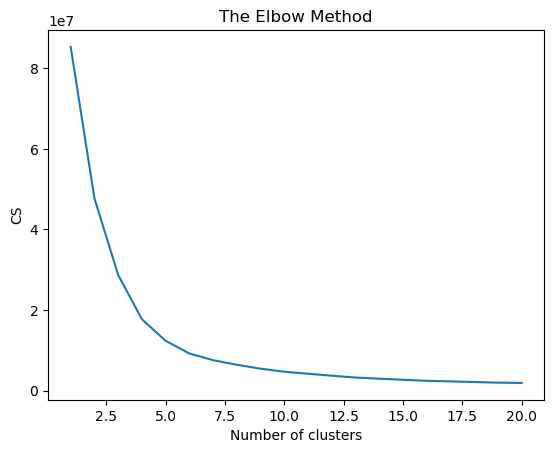

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_ada)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 21), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [21]:
n_clusters = 14
kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(data)
from sklearn.cluster import KMeans
import numpy as np
labels = kmeans.labels_
cluster_data = pd.DataFrame({'Cluster': labels})

data_with_clusters = pd.concat([data, cluster_data], axis=1)


print(data_with_clusters.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  C

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
data_with_clusters

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Cluster
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,8
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,13
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,13
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0,1
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0,1
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0,1
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0,1


In [23]:
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []

In [24]:
p=list(clusters.keys())

In [25]:
import pandas as pd

cluster_dfs = {}
for i, data_with_clusters in data_with_clusters.groupby('Cluster'):
    cluster_dfs[i] = pd.DataFrame(data_with_clusters)

In [26]:
selected_rows = []

for key in cluster_dfs.keys():
    rows = cluster_dfs[key].sample(n=10, random_state=42,replace=True)
    selected_rows.append(rows)

selected_df = pd.concat(selected_rows)

In [27]:
y_s4=selected_df['Class']

In [28]:
x_s4=selected_df[selected_df.columns.drop("Cluster")]


In [29]:
x_s4=x_s4[x_s4.columns.drop("Class")]


In [30]:
x_s4


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
215,142,1.211406,0.007850,0.950798,1.137646,-0.495189,0.301371,-0.518350,0.095426,0.817592,...,-0.049912,-0.107248,-0.057153,-0.118933,-0.421241,0.556146,-0.360164,0.076930,0.031800,9.99
166,105,1.175094,0.408263,0.552145,1.255068,-0.196662,-0.565605,0.133973,-0.146202,-0.214155,...,-0.116439,0.130585,0.523640,-0.050125,0.448133,0.597867,-0.275067,0.043308,0.023924,1.00
241,162,1.039964,-0.534355,1.865190,1.145122,-1.488133,0.589641,-1.119900,0.382781,1.419160,...,-0.053880,-0.014701,0.430843,-0.071344,0.638434,0.366778,0.451211,0.053840,0.023451,22.00
225,147,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,3.169344,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89
175,112,1.102698,0.103965,0.934479,1.152704,-0.693597,-0.584580,-0.148439,-0.112031,0.196750,...,0.037095,-0.017211,-0.098781,0.003331,0.394412,0.334208,-0.520700,0.045952,0.048005,54.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,18,0.247491,0.277666,1.185471,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,...,-0.230983,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75
113,74,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18
132,83,-1.864990,0.910874,1.724863,-1.748371,0.578943,-0.832531,1.901440,-1.913986,2.112375,...,0.274877,-0.318597,0.073323,-0.061693,0.547204,-0.466798,0.408030,-2.377933,-1.255549,7.69
81,52,1.147369,0.059035,0.263632,1.211023,-0.044096,0.301067,-0.132960,0.227885,0.252191,...,-0.255924,-0.087813,-0.110756,-0.097771,-0.323374,0.633279,-0.305328,0.027394,-0.000580,6.67


# Models

## Model-1 Logistic Regression

In [31]:
m1_acc=[]

In [33]:
# sample 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

m1 = LogisticRegression()
m1.fit(x_s1, y_s1)

y_pred = m1.predict(x_ada)

m1_acc.append(m1.score(x_ada, y_ada))
m1_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8959424083769634]

In [34]:
# sample 2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets


m1 = LogisticRegression()
m1.fit(x_s2, y_s2)

y_pred = m1.predict(x_ada)

m1_acc.append(m1.score(x_ada, y_ada))
m1_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8959424083769634, 0.8867801047120419]

In [35]:
# smaple 3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

m1 = LogisticRegression()
m1.fit(x_s3, y_s3)

y_pred = m1.predict(x_ada)

m1_acc.append(m1.score(x_ada, y_ada))
m1_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8959424083769634, 0.8867801047120419, 0.8913612565445026]

In [36]:
#sample 4
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

m1 = LogisticRegression()
m1.fit(x_s4, y_s4)

y_pred = m1.predict(x_ada)

m1_acc.append(m1.score(x_ada, y_ada))
m1_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8959424083769634,
 0.8867801047120419,
 0.8913612565445026,
 0.5615183246073299]

## Model-2 Random Forest

In [37]:
m2_acc=[]


In [38]:
##sample 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


m2 = RandomForestClassifier()

m2.fit(x_s1, y_s1)

y_pred_m1_s1 = m2.predict(x_ada)

from sklearn.metrics import accuracy_score
m2_acc.append(accuracy_score(y_ada, y_pred_m1_s1))
m2_acc

[0.9770942408376964]

In [39]:
##sample 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


m2 = RandomForestClassifier()

m2.fit(x_s2, y_s2)

y_pred_m1_s2 = m2.predict(x_ada)

from sklearn.metrics import accuracy_score
m2_acc.append(accuracy_score(y_ada, y_pred_m1_s2))
m2_acc

[0.9770942408376964, 0.9770942408376964]

In [40]:
##sample 3
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


m2 = RandomForestClassifier()

m2.fit(x_s3, y_s3)

y_pred_m1_s3 = m2.predict(x_ada)

from sklearn.metrics import accuracy_score
m2_acc.append(accuracy_score(y_ada, y_pred_m1_s3))
m2_acc

[0.9770942408376964, 0.9770942408376964, 0.9646596858638743]

In [41]:
##sample 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


m2 = RandomForestClassifier()

m2.fit(x_s4, y_s4)

y_pred_m1_s4 = m2.predict(x_ada)

from sklearn.metrics import accuracy_score
m2_acc.append(accuracy_score(y_ada, y_pred_m1_s4))
m2_acc

[0.9770942408376964,
 0.9770942408376964,
 0.9646596858638743,
 0.5019633507853403]

## Model-3 MLP Classifier

In [63]:
m3_acc=[]

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets

m3 = MLPClassifier(random_state=1, max_iter=300).fit(x_s1, y_s1)


y_pred = m3.predict(x_ada)

m3_acc.append(m3.score(x_ada, y_ada))
m3_acc


/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9064136125654451]

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets

m3 = MLPClassifier(random_state=1, max_iter=300).fit(x_s2, y_s2)


y_pred = m3.predict(x_ada)

m3_acc.append(m3.score(x_ada, y_ada))
m3_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9064136125654451, 0.9155759162303665]

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets

m3 = MLPClassifier(random_state=1, max_iter=300).fit(x_s3, y_s3)


y_pred = m3.predict(x_ada)

m3_acc.append(m3.score(x_ada, y_ada))
m3_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9064136125654451, 0.9155759162303665, 0.9064136125654451]

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import datasets

m3 = MLPClassifier(random_state=1, max_iter=300).fit(x_s4, y_s4)


y_pred = m3.predict(x_ada)

m3_acc.append(m3.score(x_ada, y_ada))
m3_acc

[0.9064136125654451,
 0.9155759162303665,
 0.9064136125654451,
 0.4993455497382199]

## Model-4 Passive Agressive Classifier

In [68]:
m4_acc = []

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import datasets

m4 = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
m4.fit(x_s1, y_s1)

y_pred = m4.predict(x_ada)

m4_acc.append(m4.score(x_ada, y_ada))
m4_acc

[0.5019633507853403]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import datasets

m4 = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
m4.fit(x_s2, y_s2)

y_pred = m4.predict(x_ada)

m4_acc.append(m4.score(x_ada, y_ada))
m4_acc

[0.5019633507853403, 0.5510471204188482]

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import datasets

m4 = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
m4.fit(x_s3, y_s3)

y_pred = m4.predict(x_ada)

m4_acc.append(m4.score(x_ada, y_ada))
m4_acc

[0.5019633507853403, 0.5510471204188482, 0.5104712041884817]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import datasets

m4 = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
m4.fit(x_s4, y_s4)

y_pred = m4.predict(x_ada)

m4_acc.append(m4.score(x_ada, y_ada))
m4_acc

[0.5019633507853403,
 0.5510471204188482,
 0.5104712041884817,
 0.4993455497382199]

## Model-5 Ada Boost

In [87]:
m5_acc=[]


In [88]:
#sample 1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10)

boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

boost.fit(x_s1, y_s1)

y_pred = boost.predict(x_ada)
m5_acc.append(accuracy_score(y_ada, y_pred))
m5_acc


/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9718586387434555]

In [89]:
#sample 2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10)

boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

boost.fit(x_s2, y_s2)

y_pred = boost.predict(x_ada)
m5_acc.append(accuracy_score(y_ada, y_pred))
m5_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9718586387434555, 0.9705497382198953]

In [90]:
#sample 3
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10)

boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

boost.fit(x_s3, y_s3)

y_pred = boost.predict(x_ada)
m5_acc.append(accuracy_score(y_ada, y_pred))
m5_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9718586387434555, 0.9705497382198953, 0.9600785340314136]

In [91]:
#sample 2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10)

boost = AdaBoostClassifier(base_estimator=rf, n_estimators=30, learning_rate=0.1)

boost.fit(x_s4, y_s4)

y_pred = boost.predict(x_ada)
m5_acc.append(accuracy_score(y_ada, y_pred))
m5_acc

/Users/sidharths/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[0.9718586387434555,
 0.9705497382198953,
 0.9600785340314136,
 0.5045811518324608]

## Model Comparision

In [92]:
model_comparision = pd.DataFrame(data=[m1_acc,m2_acc,m3_acc,m4_acc,m5_acc])


In [93]:
model_comparision

,0,1,2,3
0,0.895942,0.886780,0.891361,0.561518
1,0.977094,0.977094,0.964660,0.501963
2,0.906414,0.915576,0.906414,0.499346
3,0.501963,0.551047,0.510471,0.499346
4,0.971859,0.970550,0.960079,0.504581


In [94]:
model_comparision.index=["Logistic Regression","Random Forest","MLP Claasifier","PAC","Ada Boost"]
model_comparision.columns=["Random","Systematic","Stratified","Clustering"]

In [95]:
model_comparision

,Random,Systematic,Stratified,Clustering
Logistic Regression,0.895942,0.886780,0.891361,0.561518
Random Forest,0.977094,0.977094,0.964660,0.501963
MLP Claasifier,0.906414,0.915576,0.906414,0.499346
PAC,0.501963,0.551047,0.510471,0.499346
Ada Boost,0.971859,0.970550,0.960079,0.504581
